# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
dataset = get_dataset("/home/workspace/data/*/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/*/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/*/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 99
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_images(batch):
    colormap = { 1: 'r', 2: 'b', 4: 'g' } #['y', 'r', 'b', 'o', 'g']
    for data in batch:
        fig, ax = plt.subplots()

        img_x = data['image'].numpy().shape[0]
        img_y = data['image'].numpy().shape[1]
        ax.imshow(data['image'].numpy())

        for bbox, label in zip(data['groundtruth_boxes'], data['groundtruth_classes']):
            x1, x2, y1, y2 = bbox[1], bbox[3], bbox[0], bbox[2]
            label = label.numpy()
            rect = patches.Rectangle(
                (x1 * img_x, y1 * img_y), 
                (x2 - x1) * img_x, 
                (y2 - y1) * img_y, 
                linewidth=1,
                edgecolor=colormap[label], 
                facecolor='none'
            )
            ax.add_patch(rect)

    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

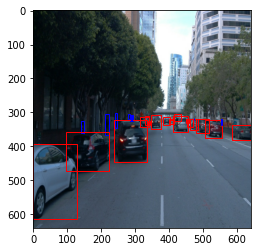

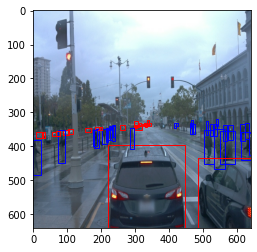

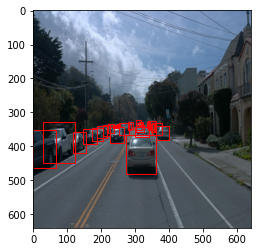

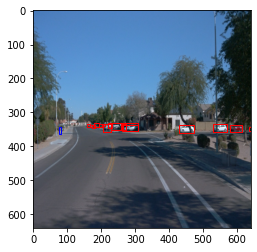

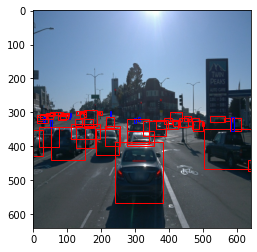

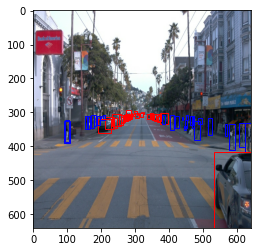

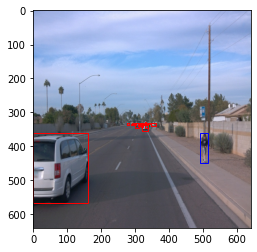

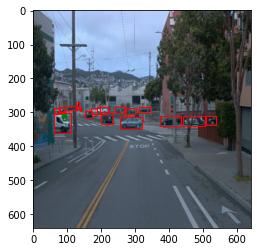

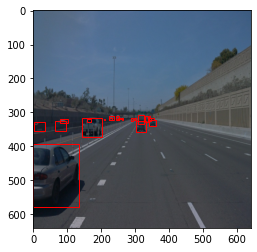

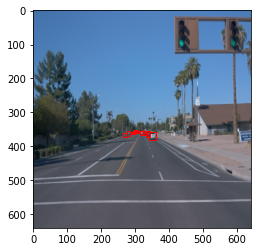

In [4]:
# Display 10 random images in dataset
display_images(dataset.shuffle(100).take(10))

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

### Objects recogniced
Here we are going to see how many objects of each type has been recognized

In [5]:
num_imgs = 100
num_objects = [0, 0, 0, 0, 0]
obj_presence = np.array([0, 0, 0, 0, 0])
for data in dataset.take(num_imgs):
    obj_present = np.array([0, 0, 0, 0, 0])
    for obj in data["groundtruth_classes"]:
        num_objects[obj] += 1
        obj_present[obj] = 1
    obj_presence += obj_present

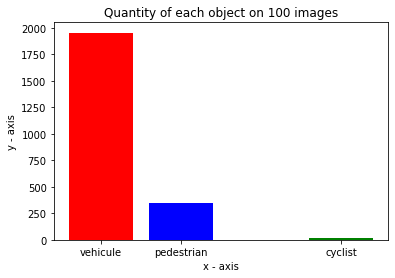

In [6]:
# x-coordinates of left sides of bars 
left = [1, 2, 4]
  
# heights of bars
height = [num_objects[1], num_objects[2], num_objects[4]]
  
# labels for bars
tick_label = ['vehicule', 'pedestrian', 'cyclist']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'blue', 'green'])
  
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title(f'Quantity of each object on {num_imgs} images')
  
# function to show the plot
plt.show()

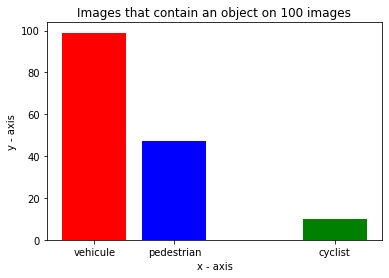

In [7]:
# x-coordinates of left sides of bars 
left = [1, 2, 4]
  
# heights of bars
height = [obj_presence[1]*100/num_imgs, obj_presence[2]*100/num_imgs, obj_presence[4]*100/num_imgs]
  
# labels for bars
tick_label = ['vehicule', 'pedestrian', 'cyclist']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'blue', 'green'])
  
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title(f'Images that contain an object on {num_imgs} images')
  
# function to show the plot
plt.show()